<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>

# Machine Learning in Finance Lab: Week 07

## deadline 2022-03-09 ##


* Yu-Ching Liao <ycliao3@illinois.edu>

# Basic Import

In [9]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,cross_validate,GridSearchCV

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree

In [33]:
cc = pd.read_csv(
    "/Users/yu-chingliao/Library/CloudStorage/GoogleDrive-josephliao0127@gmail.com/My Drive/Note/UIUC/Spring_2023/IE517A_Machine Learning in Finance Lab/Lecture Notes/Week 06/ccdefault.csv",
    index_col='ID')
X = cc.drop("DEFAULT", axis=1)
y =cc["DEFAULT"]

# Random Forest

In [34]:
hyperparameters = {
    'n_estimators': [10, 50, 100]
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, hyperparameters, cv=10, scoring='accuracy',return_train_score = True) # not using cv
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

# a)	What is the relationship between n_estimators, in-sample CV accuracy and computation time?
As shown below, as the n_estimator grown, the in-sample CV accuracy will as well grown in their value. However, the calculation time elapse will grown even dramatically as the number of estimators grown. 

In [35]:
result = grid_search.cv_results_
output = pd.DataFrame({'Parameters':result['params'] ,
                                'Training Accuracy' : result['mean_train_score'],
                                'Testing Accuracy': result['mean_test_score'],
                                'Time Consumption': result['mean_score_time']
                                })
display(output)

,Parameters,Training Accuracy,Testing Accuracy,Time Consumption
0,{'n_estimators': 10},0.979830,0.807767,0.007723
1,{'n_estimators': 50},0.998781,0.815800,0.031192
2,{'n_estimators': 100},0.999322,0.817033,0.062124


# b)	What is the optimal number of estimators for your forest? 
As shown below, the optimal number of estimators is 50 in my model. 

In [36]:
print("The best number of estimators is: ",grid_search.best_params_)

The best number of estimators is:  {'n_estimators': 100}


# c)	Which features contribute the most importance in your model according to scikit-learn function?
As shown below, "PAY_0" contribute the most importance in my model.

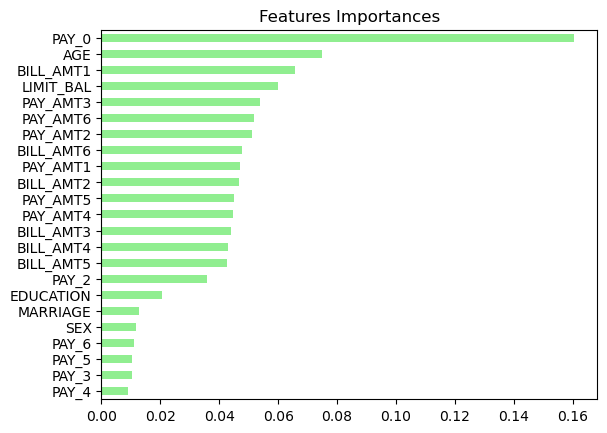

In [37]:
best_n_est = list(grid_search.best_params_.values())[0]

rf = RandomForestRegressor(n_estimators=best_n_est)
rf.fit(x, y)
importances = pd.Series(data=rf.feature_importances_,
                            index= x.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show() 

# d)	What is feature importance and how is it calculated?  (If you are not sure, refer to the Scikit-Learn.org documentation.)
Feature importance is a method used to identify which features or variables in a dataset have the most significant impact on the outcome of a particular machine learning model. They are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

# Signing
My name is Yu-Ching Liao<br>
My NetID is: 656724372<br>
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.

# Link to github repo
https://github.com/yu7yu7/IE517_Machine-Learning-in-Finance-Lab/blob/main/IE517_SP23_HW7/%20ML_Week07_HW.ipynb

<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>